In [1]:
# read sequence dari fasta 
# seqA = 20 awal + 4 akhir
# seqB = 10 awal seqA + 17 dari tengah seq0
# show diagram bar menggunakna matplotlib
# - freq A,T,G,C
# - presentase AT dan GC
# print len dari seqA, seqB, dan Seq0
# transcribe SeqA dan SeqB
# translate SeqA dan SeqB
# print molecular weight
# print melting temp menggunakan wallace dan gc
# local alignment seqA dengan subseq ('ATGCAAT')
# Global alignment seqA dan seqB

In [3]:
from Bio import SeqIO

In [7]:
readFile = SeqIO.parse("x.fasta","fasta")

seq0 = ""
for n in readFile:
    seq0 = n.seq
print(seq0)

ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGNNNNNNNNNNNNNNNNNNCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTTCGCCAGGAGGTGGGCTCCCACGGCCGGGACACCCGCGGCATCTTCCGAGTCCATCAGTTTGAGAAGATCGAGCAGTTTGTCTACGCGTCAC

In [37]:
seqA = seq0[:20]+seq0[-4:]
mid = int(len(seq0)/2)
seqB = seqA[:10]+seq0[mid:mid+17]
# seqB = seqA[:10]+seq0[]
print(f"Basa Nukleotida Sequence A : {seqA}")
print(f"Basa Nukleotida Sequence B : {seqB}")


Basa Nukleotida Sequence A : ATGGTGTTGGATCTGGACTTGTCA
Basa Nukleotida Sequence B : ATGGTGTTGGCCGCGGCATCTTCCGAG


Text(0, 0.5, 'Basa Nukleotida')

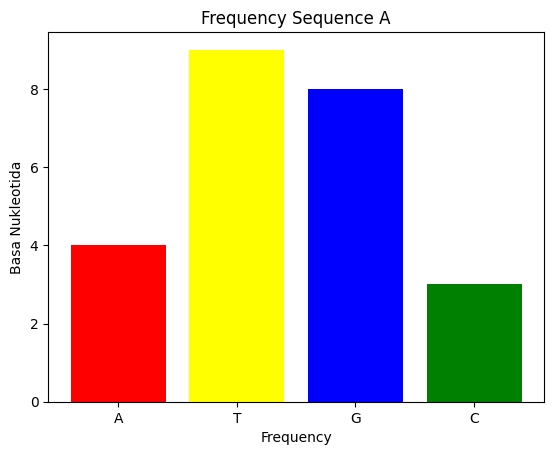

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

countSeqA = Counter(seqA)
seqAKeys = countSeqA.keys()
seqAValues = countSeqA.values()

plt.bar(seqAKeys, seqAValues, color = ["red","yellow",'blue',"green"])
plt.title("Frequency Sequence A")
plt.xlabel("Frequency")
plt.ylabel("Basa Nukleotida")

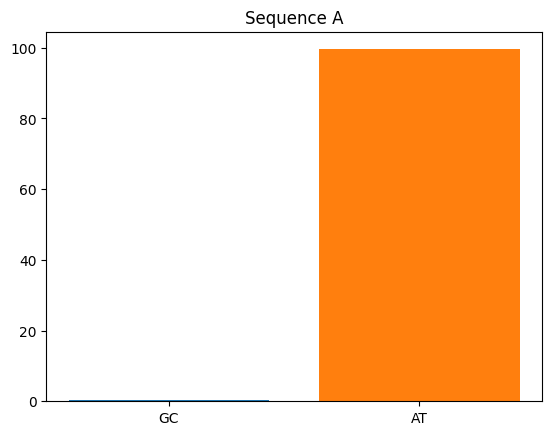

In [25]:
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction
seqA_percentage_GC = gc_fraction(seqA)
seqA_percentage_AT = 1-seqA_percentage_GC

plt.title("Sequence A")
plt.bar("GC",seqA_percentage_GC)
plt.bar("AT", seqA_percentage_AT)
plt.show()

In [22]:
print(f"Panjang dari SeqA : {len(seqA)}")
print(f"Panjang dari SeqB : {len(seqB)}")
print(f"Panjang dari Seq) : {len(seq0)}")

Panjang dari SeqA : 24
Panjang dari SeqB : 27
Panjang dari Seq) : 1883


In [27]:
seqA_transcribe = seqA.transcribe()
seqB_transcribe = seqB.transcribe()
print(f"Trankripsi Sequence A : {seqA_transcribe}")
print(f"Trankripsi Sequence B : {seqB_transcribe}")


Trankripsi Sequence A : AUGGUGUUGGAUCUGGACUUGUCA
Trankripsi Sequence B : AUGGUGUUGGCCGCGGCAUCUUCCGAG


In [28]:
seqA_translate = seqA_transcribe.translate()
seqB_translate = seqB_transcribe.translate()
print(f"Translasi Sequence A : {seqA_translate}")
print(f"Translasi Sequence B : {seqB_translate}")




Translasi Sequence A : MVLDLDLS
Translasi Sequence B : MVLAAASSE


In [30]:
from Bio.SeqUtils import molecular_weight

SeqA_molecularWeight = molecular_weight(seqA)
print("Molecular Weight SeqA :", SeqA_molecularWeight)

SeqB_molecularWeight = molecular_weight(seqB)
print("Molecular Weight SeqB :", SeqB_molecularWeight)

Molecular Weight SeqA : 7509.7727
Molecular Weight SeqB : 8403.3188


In [32]:
from Bio.SeqUtils import MeltingTemp

SeqA_meltingTemp = MeltingTemp.Tm_Wallace(seqA)
seqB_meltingTemp = MeltingTemp.Tm_Wallace(seqB)

print(f"Melting Time Sequence A : {SeqA_meltingTemp}")
print(f"Melting Temp Sequence B : {seqB_meltingTemp}")

Melting Time Sequence A : 70.0
Melting Temp Sequence B : 88.0


In [35]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

alignment_global = pairwise2.align.globalxx(seqA, "ATGCAAT")
for i in alignment_global:
    print(format_alignment(*i))

print("---------------------------------------")



ATGGTGTTGGATCTGGACTTGTCA-
|      | |  |   |      | 
A------T-G--C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTGTCA-
|     |  |  |   |      | 
A-----T--G--C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTGTCA-
|   |    |  |   |      | 
A---T----G--C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTGTCA-
||       |  |   |      | 
AT-------G--C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTGTCA-
|      ||   |   |      | 
A------TG---C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTGTCA-
|     | |   |   |      | 
A-----T-G---C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTGTCA-
|   |   |   |   |      | 
A---T---G---C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTGTCA-
||      |   |   |      | 
AT------G---C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTGTCA-
|   ||      |   |      | 
A---TG------C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTGTCA-
||   |      |   |      | 
AT---G------C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTGTCA-
|| |        |   |      | 
AT-G--------C---A------AT
  Score=6

ATGGTGTTGGATCTGGACTTG

In [36]:
alignment_local = pairwise2.align.localxx(seqA, seqB)
for i in alignment_local:
    print(format_alignment(*i))

1 ATGGTGTTGGATCT-G-GA-C-T-TGTC--A
  ||||||||||  |  | |  | | | ||  |
1 ATGGTGTTGG--C-CGCG-GCATCT-TCCGA
  Score=19

1 ATGGTGTTGGATCTG-GA-C-T-TGTC--A
  ||||||||||  |.| |  | | | ||  |
1 ATGGTGTTGG--CCGCG-GCATCT-TCCGA
  Score=19

1 ATGGTGTTGGAT-CTG-GA-C-T-TGTC--A
  ||||||||||   | | |  | | | ||  |
1 ATGGTGTTGG--CC-GCG-GCATCT-TCCGA
  Score=19

1 ATGGTGTTGGATCTG-GA-C-T-TGTC--A
  |||||||||| .| | |  | | | ||  |
1 ATGGTGTTGG-CC-GCG-GCATCT-TCCGA
  Score=19

1 ATGGTGTTGGATCTG-GA-C-T-TGTC--A
  ||||||||||. | | |  | | | ||  |
1 ATGGTGTTGGC-C-GCG-GCATCT-TCCGA
  Score=19

1 ATGGTGTTGGATCT-G-GAC-T-TGTC--A
  ||||||||||  |  | |.| | | ||  |
1 ATGGTGTTGG--C-CGCGGCATCT-TCCGA
  Score=19

1 ATGGTGTTGGATCTG-GAC-T-TGTC--A
  ||||||||||  |.| |.| | | ||  |
1 ATGGTGTTGG--CCGCGGCATCT-TCCGA
  Score=19

1 ATGGTGTTGGAT-CTG-GAC-T-TGTC--A
  ||||||||||   | | |.| | | ||  |
1 ATGGTGTTGG--CC-GCGGCATCT-TCCGA
  Score=19

1 ATGGTGTTGGATCTG-GAC-T-TGTC--A
  |||||||||| .| | |.| | | ||  |
1 ATGGTGTTGG-CC-GCGGCATCT-TCCGA
  Score=19

1